# Word Embeddings

A word embedding is a class of approaches for representing words and documents using a
dense vector representation. It is an improvement over more the traditional bag-of-word model
encoding schemes where large sparse vectors were used to represent each word or to score each
word within a vector to represent an entire vocabulary. These representations were sparse
because the vocabularies were vast and a given word or document would be represented by a
large vector comprised mostly of zero values.

Instead, in an embedding, words are represented by dense vectors where a vector represents
the projection of the word into a continuous vector space. The position of a word within the
vector space is learned from text and is based on the words that surround the word when it is
used. The position of a word in the learned vector space is referred to as its embedding. Two
popular examples of methods of learning word embeddings from text include:
+ Word2Vec.
+ GloVe.

In addition to these carefully designed methods, a word embedding can be learned as part
of a deep learning model. This can be a slower approach, but tailors the model to a specific
training dataset.

In [1]:
# !pip install gensim

In [2]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
        ['this', 'is', 'the', 'second', 'sentence'],
        ['yet', 'another', 'sentence'],
        ['one', 'more', 'sentence', 'love'],
        ['and', 'the', 'final', 'sentence', 'solve']]

In [4]:
# train model
cbow_model = Word2Vec(sentences, vector_size =50, window = 3, min_count=1, sg=0)

In [7]:
# summarize the loaded model
print(cbow_model)

Word2Vec(vocab=16, vector_size=50, alpha=0.025)


In [12]:
# summarize vocabulary
list(cbow_model.wv.index_to_key)

['sentence',
 'the',
 'is',
 'this',
 'solve',
 'final',
 'and',
 'love',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [18]:
cbow_model.wv.key_to_index.keys()


dict_keys(['sentence', 'the', 'is', 'this', 'solve', 'final', 'and', 'love', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first'])

In [27]:
# access vector for one word
print(cbow_model.wv['another'])

[-1.74535941e-02  4.26060427e-03 -1.74953626e-03 -1.86410993e-02
 -1.88580621e-02 -2.82530021e-03  8.86634830e-03  7.40583427e-03
 -1.30005712e-02 -1.37469480e-02 -9.99581534e-03 -4.57480177e-03
 -1.44988121e-02 -1.92055944e-02 -5.49070723e-03 -1.67252384e-02
 -1.20736258e-02 -1.13346195e-02 -4.69196076e-03 -3.41640459e-03
 -1.79113075e-02 -1.46642898e-03  1.63068715e-02  1.53799504e-02
 -1.44101698e-02 -7.33157946e-03  6.23950642e-03 -1.91403646e-02
  2.95125111e-03  1.30452961e-02  1.14926901e-02 -1.75251979e-02
 -9.03302059e-03 -1.62775386e-02  8.66255505e-05  1.85259376e-02
  1.19486498e-02  1.01312874e-02  1.01202279e-02 -6.48938911e-03
  1.91045608e-02 -1.47139784e-02 -1.45362383e-02 -4.53456119e-03
 -1.55063986e-03 -6.42833114e-03 -1.18805864e-03  1.49736442e-02
 -1.39421318e-03 -3.24981473e-03]


In [23]:
print(cbow_model.wv['Pune'])

KeyError: "Key 'Pune' not present"

In [24]:
# save model
cbow_model.save('model.bin')

In [25]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=16, vector_size=50, alpha=0.025)


In [26]:
sg_model = Word2Vec(sentences, vector_size =50, window = 3, min_count=1, sg=1)
# access vector for one word
print(sg_model.wv['another'])

[-1.74580123e-02  4.26293537e-03 -1.75216561e-03 -1.86403450e-02
 -1.88675355e-02 -2.82711582e-03  8.87034740e-03  7.42043182e-03
 -1.30050294e-02 -1.37497867e-02 -9.99344420e-03 -4.57151653e-03
 -1.45037472e-02 -1.91997457e-02 -5.49524883e-03 -1.67320333e-02
 -1.20706186e-02 -1.13285277e-02 -4.69730468e-03 -3.42671364e-03
 -1.79051682e-02 -1.47216732e-03  1.63192507e-02  1.53966621e-02
 -1.44105786e-02 -7.33446609e-03  6.23733830e-03 -1.91246122e-02
  2.93796510e-03  1.30443005e-02  1.14872074e-02 -1.75278578e-02
 -9.02537070e-03 -1.62951443e-02  9.35844946e-05  1.85166225e-02
  1.19584352e-02  1.01316273e-02  1.01190656e-02 -6.49483688e-03
  1.90937351e-02 -1.47136990e-02 -1.45518361e-02 -4.53226594e-03
 -1.54337590e-03 -6.43786089e-03 -1.18293113e-03  1.49841029e-02
 -1.38671941e-03 -3.25100636e-03]


In [0]:
# DTM shape = "no of unique words in vocab " x 50

### Visualisation of Similar Words using PCA & T-SNE

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [28]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
X.shape

AttributeError: ignored

In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
result.shape

(14, 2)

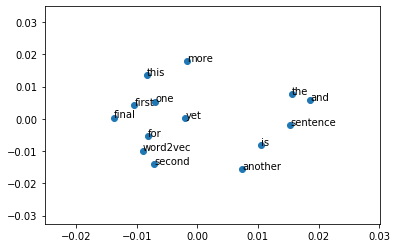

In [0]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 14 samples in 0.000s...
[t-SNE] Computed neighbors for 14 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.853699
[t-SNE] KL divergence after 300 iterations: 0.357913


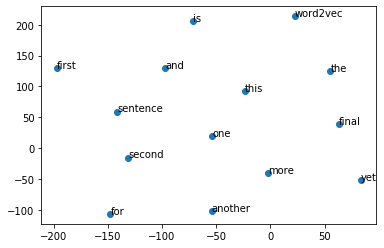

In [0]:
# create a scatter plot of the projection
pyplot.scatter(X_tsne[:, 0], X_tsne[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
pyplot.show()

### Some computations using Word Embeddings

In [1]:
from gensim.models import KeyedVectors

# load the google word2vec model
path = r'D:\Google Drive\Training\1 MASTER\NLP\Word Embeddings\GoogleNews-vectors-negative300.bin'
filename = path + r'\GoogleNews-vectors-negative300.bin'

# filename = r'C:\Users\dell\Google Drive\DUMP\Desktop\Nomura NLP\Word Embedding\WV -1\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [2]:
# calculate: (king - man) + woman = ?  (Queen)
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print(result)

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951)]


In [3]:
result = model.most_similar(positive=['God', 'cricket', 'India'], negative=[], topn=3)
print(result)

[('cricketing', 0.6579138040542603), ('Sachin', 0.6445839405059814), ('cricketers', 0.6345412731170654)]


In [7]:
# Einstein : physics , then ? : Chemistry

result = model.most_similar(positive=['Raman', 'Chemistry', 'India'], negative=['Physics'], topn=3)
print(result)

[('Krishnan', 0.6574984192848206), ('Shukla', 0.6527838706970215), ('Sanjay', 0.6461844444274902)]


In [8]:
result = model.most_similar(positive=['man', 'female'], negative=['male'], topn=3)
print(result)

[('woman', 0.7685462236404419), ('teenage_girl', 0.5872832536697388), ('lady', 0.5742952823638916)]


In [13]:
#Checking how similarity works. 
print (model.similarity('book', 'mango'))

0.12006663


In [12]:
print(model.similarity('novel', 'book'))

0.61219364


In [15]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())
# model.doesnt_match('mango apple banana rose'.split())

'cereal'

## Using Stanford’s GloVe Embedding

Stanford researchers also have their own word embedding algorithm like Word2Vec called `Global
Vectors` for Word Representation, or `GloVe` for short. 

You can download the GloVe pre-trained word vectors and load them easily with `Gensim`. The first step is to convert the GloVe file format to the Word2Vec file format. The only difference is the addition of a small header line. This can be done by calling the `glove2word2vec()` function.  Once converted, the file can be loaded just like Word2Vec file above. 

You can download the smallest GloVe pre-trained model from the GloVe
website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional
vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary. The
direct download link is here http://nlp.stanford.edu/data/glove.6B.zip

In [34]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# convert glove to word2vec format
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [35]:
# load the converted model
filename = 'word2vec.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

You now have a copy of the `GloVe` model in `Word2Vec` format with the filename
`glove.6B.100d.txt.word2vec`. Now we can load it and perform the same `(king - man) + woman = ?` test as in the previous section.

In [36]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


### Further Reading:

#### Word Embeddings
+ Word Embedding on Wikipedia.https://en.wikipedia.org/wiki/Word2vec
+ Word2Vec on Wikipedia. https://en.wikipedia.org/wiki/Word2vec
+ Google Word2Vec project. https://code.google.com/archive/p/word2vec/
+ Stanford GloVe project. https://nlp.stanford.edu/projects/glove/

### Articles
+ Messing Around With Word2Vec, 2016. https://quomodocumque.wordpress.com/2016/01/15/messing-around-with-word2vec/
+ Vector Space Models for the Digital Humanities, 2015. http://bookworm.benschmidt.org/posts/2015-10-25-Word-Embeddings.html
+ Gensim Word2Vec Tutorial, 2014. https://rare-technologies.com/word2vec-tutorial/

# Keras Embedding Layer
Keras offers an Embedding layer that can be used for neural networks on text data. It requires
that the input data be integer encoded, so that each word is represented by a unique integer.
This data preparation step can be performed using the Tokenizer API also provided with
Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all
of the words in the training dataset. It is a flexible layer that can be used in a variety of ways,
such as:
+ It can be used alone to learn a word embedding that can be saved and used in another
model later.
+ It can be used as part of a deep learning model where the embedding is learned along
with the model itself.
+ It can be used to load a pre-trained word embedding model, a type of transfer learning.

The Embedding layer is defined as the first hidden layer of a network. It must specify 3
arguments:
+ `input dim`: This is the size of the vocabulary in the text data. 
+ `output dim`: This is the size of the vector space in which words will be embedded. It
defines the size of the output vectors from this layer for each word.
+ `input length`: This is the length of input sequences, as you would define for any input
layer of a Keras model. For example, if all of your input documents are comprised of 1000
words, this would be 1000.

The `Embedding` layer has weights that are learned. The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document). If you wish to connect a `Dense` layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the `Flatten` layer.

In [1]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

Using TensorFlow backend.


In [2]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[40, 4], [49, 28], [35, 45], [26, 28], [48], [6], [7, 45], [28, 49], [7, 28], [32, 49, 4, 40]]


In [3]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[40  4  0  0]
 [49 28  0  0]
 [35 45  0  0]
 [26 28  0  0]
 [48  0  0  0]
 [ 6  0  0  0]
 [ 7 45  0  0]
 [28 49  0  0]
 [ 7 28  0  0]
 [32 49  4 40]]


In [8]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 20, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 20)             1000      
_________________________________________________________________
flatten_3 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               10368     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 11,497
Trainable params: 11,497
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Accuracy: 100.000000


# Using Pre-Trained GloVe Embedding

The smallest package of embeddings is 822 Megabytes, called glove.6B.zip from https://nlp.stanford.edu/projects/glove/

It was trained on a dataset of one billion tokens (words) with a vocabulary of 400 thousand words. There are a few different embedding vector sizes, including 50, 100, 200 and 300 dimensions. You can download this collection of embeddings and we can seed the Keras Embedding layer with weights from the pre-trained embedding for the words in your training dataset.

Alternately download the `glove.6B.100d.txt` from https://www.kaggle.com/terenceliu4444/glove6b100dtxt#glove.6B.100d.txt


In [0]:
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [0]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

In [0]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [0]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [0]:
t.word_index.items()

dict_items([('work', 1), ('done', 2), ('good', 3), ('effort', 4), ('poor', 5), ('well', 6), ('great', 7), ('nice', 8), ('excellent', 9), ('weak', 10), ('not', 11), ('could', 12), ('have', 13), ('better', 14)])

In [0]:
len(t.word_index.items())

14

In [0]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))

for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
embedding_matrix.shape

(15, 100)

In [0]:
embedding_matrix[1]

array([-1.16190001e-01,  4.54470009e-01, -6.92160010e-01,  3.45799997e-02,
        2.63480008e-01, -3.81390005e-01, -2.27899998e-01,  3.72330010e-01,
       -2.05789998e-01,  2.90199995e-01,  1.21140003e-01, -4.27289993e-01,
        5.55729985e-01, -9.42860022e-02, -4.99669999e-01, -2.94779986e-01,
        7.41090000e-01,  2.51910001e-01, -2.74679989e-01,  2.31910005e-01,
        3.82039999e-03,  4.52519991e-02,  2.49699995e-01, -4.15789992e-01,
        3.13069999e-01, -5.84959984e-01, -3.27389985e-01, -6.61889970e-01,
        1.49090007e-01, -2.57710010e-01, -9.48580027e-01,  4.18089986e-01,
       -2.95379996e-01, -4.27110009e-02, -6.99699998e-01,  5.78920007e-01,
       -6.92709982e-02, -3.96329984e-02, -5.64630004e-03, -2.96160012e-01,
       -5.74479997e-01,  1.60099998e-01, -1.06710002e-01,  1.00960001e-01,
       -4.29560006e-01, -2.77850002e-01, -3.00170004e-01, -6.95370018e-01,
        1.79649994e-01, -4.67229992e-01,  1.25110000e-01, -2.90220007e-02,
       -1.59740001e-01,  

In [0]:
# define model
model = Sequential()
e = Embedding(vocab_size, output_dim = embedding_matrix.shape[1], \
              weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# summarize the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 4, 100)            1500      
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 401       
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________


In [0]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


# Facebook's FastText

`fastText` is the improvised version of `word2vec`. `word2vec` basically considers words to build the representation. But `fastText` takes each character while computing the representation of the word.

In [0]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [0]:
from gensim.models import FastText
fast = FastText(sentences,size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

In [0]:
print(fast['future'])
print(fast['zebra'])

[-0.01609092 -0.01333408 -0.00451387 -0.00959434 -0.00062645  0.00699576
 -0.00927582 -0.00045178 -0.01266145 -0.00076565 -0.00091716  0.00271334
 -0.00277225 -0.00469515  0.00570936  0.03036731  0.01065178 -0.00412795
 -0.01336461  0.00763317]
[-0.00560116 -0.00329034 -0.00672705 -0.00549068  0.00451328 -0.0107388
 -0.00015068 -0.00612774 -0.00882524  0.00384905  0.00334423  0.00024032
  0.00290012  0.00069369 -0.00908341 -0.00578595  0.00441674  0.00024137
 -0.00944444 -0.02649391]


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
fastX = fast[fast.wv.vocab]
fastX.shape

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(21, 20)

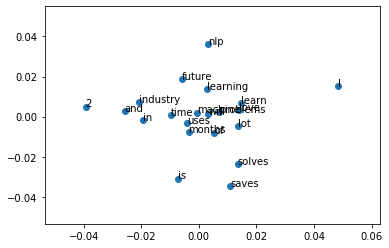

In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(fastX)
result.shape

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.015869
[t-SNE] KL divergence after 300 iterations: 0.438380


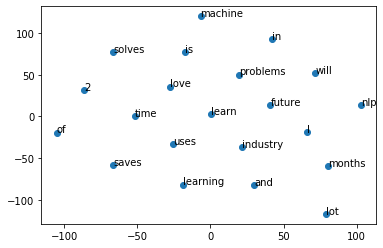

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(fastX)

# create a scatter plot of the projection
pyplot.scatter(X_tsne[:, 0], X_tsne[:, 1])
words = list(fast.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
pyplot.show()